<a href="https://colab.research.google.com/github/Octaxx/DLI-Assignment/blob/main/Kaifung_Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import requests
import nbformat
from IPython import get_ipython

# Load and run DatasetCleaning.ipynb from GitHub (including Step 7)
url = "https://raw.githubusercontent.com/Octaxx/DLI-Assignment/refs/heads/main/DatasetCleaning.ipynb"
response = requests.get(url)
notebook = nbformat.reads(response.text, as_version=4)
ipython = get_ipython()

print("⚙️ Running cells from DatasetCleaning.ipynb...\n")

for i, cell in enumerate(notebook.cells):
    if cell.cell_type == 'code':
        try:
            print(f"▶️ Executing cell {i+1}...")
            ipython.run_cell(cell.source)
        except Exception as e:
            print(f"❌ Error in cell {i+1}: {e}")

print("\n✅ All notebook cells executed.")

⚙️ Running cells from DatasetCleaning.ipynb...

▶️ Executing cell 2...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
▶️ Executing cell 3...
📊 BEFORE BALANCING
--------------------------------------------------
Total rows before balancing: 18634
Class balance before balancing:
Email Type
Safe Email        11322
Phishing Email     7312
Name: count, dtype: int64


,Email Text,Email Type,Label
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,0
1,the other side of * galicismos * * galicismo *...,Safe Email,0
2,re : equistar deal tickets are you still avail...,Safe Email,0
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,1
4,software at incredibly low prices ( 86 % lower...,Phishing Email,1
5,global risk management operations sally congra...,Safe Email,0
6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email,0
7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email,1
8,"we owe you lots of money dear applicant , afte...",Phishing Email,1
9,re : coastal deal - with exxon participation u...,Safe Email,0


▶️ Executing cell 4...

📊 AFTER BALANCING (Oversampling)
--------------------------------------------------
Total rows after balancing: 22644
Class balance after balancing:
Email Type
Phishing Email    11322
Safe Email        11322
Name: count, dtype: int64
▶️ Executing cell 5...

🧾 SAMPLE OF CLEANED & BALANCED DATAFRAME
Total Rows        : 22644
Phishing Emails   : 11322
Safe Emails       : 11322

🧪 Cleaned & Balanced DataFrame (First 5 Rows):


,Email Text,Email Type,Label
0,INVESTMENT SCHOLARS CLUB- bringing you the lat...,Phishing Email,1
1,semantics : il dominio tempo-aspettuale il dom...,Safe Email,0
2,mature mom and her young horny lover ! . . woo...,Phishing Email,1
3,do you own a car ; starting december 7 th ford...,Phishing Email,1
4,rescue you from highprice medicaments and badp...,Phishing Email,1



🎯 Phishing Emails (First 5):


,Email Text,Email Type,Label
0,INVESTMENT SCHOLARS CLUB- bringing you the lat...,Phishing Email,1
2,mature mom and her young horny lover ! . . woo...,Phishing Email,1
3,do you own a car ; starting december 7 th ford...,Phishing Email,1
4,rescue you from highprice medicaments and badp...,Phishing Email,1
11,New Web Technology\nUNLIMITED WEB CONFERENCING...,Phishing Email,1



✅ Safe Emails (First 5):


,Email Text,Email Type,Label
1,semantics : il dominio tempo-aspettuale il dom...,Safe Email,0
5,http://www.bbc.co.uk/radio1/alt/nireland/ni_te...,Safe Email,0
6,Hi Damian.SuSe has a Sparc version I previousl...,Safe Email,0
7,"hpl nom for may 25 , 2001 ( see attached file ...",Safe Email,0
8,iatl 14 : final cfp the 14th annual meeting - ...,Safe Email,0


▶️ Executing cell 6...

🧠 Sample Extracted Features (First 5):


,Email Preview,char_count,word_count,exclamation_count,uppercase_ratio,has_link,has_login_word,has_html
0,INVESTMENT SCHOLARS CLUB- bringing you the lat...,3893,586,2,0.034,0,1,0
1,semantics : il dominio tempo-aspettuale il dom...,904,154,0,0.000,0,0,0
2,mature mom and her young horny lover ! . . woo...,664,141,1,0.000,0,0,0
3,do you own a car ; starting december 7 th ford...,792,170,0,0.000,0,0,0
4,rescue you from highprice medicaments and badp...,796,163,0,0.000,0,0,0



✅ Final Columns:
['Email Text', 'Email Type', 'Label', 'Email Preview', 'char_count', 'word_count', 'exclamation_count', 'uppercase_ratio', 'has_link', 'has_login_word', 'has_html']

✅ All notebook cells executed.


In [ ]:
import time
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback


In [ ]:
custom_features = ['char_count', 'word_count', 'exclamation_count',
                   'uppercase_ratio', 'has_link', 'has_login_word', 'has_html']

text_transformer = TfidfVectorizer(stop_words='english', max_features=7000, ngram_range=(1, 2), min_df=2)
column_transformer = ColumnTransformer([
    ('text', text_transformer, 'Email Text'),
    ('custom', 'passthrough', custom_features)
])


In [ ]:
def create_mlp_model():
    model = Sequential([
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
num_runs = int(input("Enter number of runs for evaluation (e.g., 10): "))
results = []

Enter number of runs for evaluation (e.g., 10): 10


In [ ]:
for run in range(num_runs):
    print(f"\n📦 Hybrid Training Run {run+1}/{num_runs}")

    X = df_balanced[['Email Text'] + custom_features]
    y = df_balanced['Label'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=run)

    # Transform for MLP input
    X_train_transformed = column_transformer.fit_transform(X_train)
    X_test_transformed = column_transformer.transform(X_test)

    # === Train MLP ===
    model = create_mlp_model()
    history = model.fit(X_train_transformed, y_train,
                        validation_split=0.1,
                        epochs=30,
                        batch_size=32,
                        verbose=1)

    # === Get MLP Output Probabilities ===
    train_probs = model.predict(X_train_transformed).flatten().reshape(-1, 1)
    test_probs = model.predict(X_test_transformed).flatten().reshape(-1, 1)

    # === Combine MLP output + original custom features (excluding text) ===
    X_train_stack = np.hstack([train_probs, X_train[custom_features].values])
    X_test_stack = np.hstack([test_probs, X_test[custom_features].values])


    scaler = MinMaxScaler()
    X_train_stack = scaler.fit_transform(X_train_stack)
    X_test_stack = scaler.transform(X_test_stack)

    # === Train Stacking Models ===
    clf_nb = MultinomialNB()
    clf_svm = CalibratedClassifierCV(estimator=LinearSVC(), cv=3)


    clf_nb.fit(X_train_stack, y_train)
    clf_svm.fit(X_train_stack, y_train)

    # === Evaluate ===
    for clf_name, clf in zip(['Naive Bayes', 'SVM'], [clf_nb, clf_svm]):
        y_pred = clf.predict(X_test_stack)
        y_proba = clf.predict_proba(X_test_stack)[:, 1] if hasattr(clf, "predict_proba") else y_pred

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc = roc_auc_score(y_test, y_proba)

        print(f"\n✅ Stacked Classifier ({clf_name}) Results:")
        print(f"Accuracy: {acc:.4f}  Precision: {prec:.4f}  Recall: {rec:.4f}  F1: {f1:.4f}  ROC AUC: {roc:.4f}")

        results.append({
            'Model': clf_name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1': f1,
            'ROC_AUC': roc
        })



📦 Hybrid Training Run 1/10
Epoch 1/30
510/510 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6166 - loss: 1.4975 - val_accuracy: 0.8052 - val_loss: 0.6040
Epoch 2/30
510/510 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8075 - loss: 0.6675 - val_accuracy: 0.6799 - val_loss: 1.3519
Epoch 3/30
510/510 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8460 - loss: 0.6089 - val_accuracy: 0.8775 - val_loss: 0.5170
Epoch 4/30
510/510 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8442 - loss: 3.4593 - val_accuracy: 0.8797 - val_loss: 0.3546
Epoch 5/30
510/510 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9373 - loss: 0.2514 - val_accuracy: 0.9503 - val_loss: 0.1717
Epoch 6/30
510/510 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8188 - loss: 7.7614 - val_accuracy: 0.9498 - val_loss: 0.2725
Epoch 7/30
510/510 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8824 - loss: 3.3182 - val_accuracy: 0.9409 - val_loss: 0.3762
Epoch 8/30
510/510 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.

In [ ]:
results_df = pd.DataFrame(results)
summary = results_df.mean(numeric_only=True).round(4)
print("\n📊 Average Results Across All Runs:\n")
print(summary)



📊 Average Results Across All Runs:

Accuracy     0.8464
Precision    0.8178
Recall       0.9313
F1           0.8663
ROC_AUC      0.9235
dtype: float64


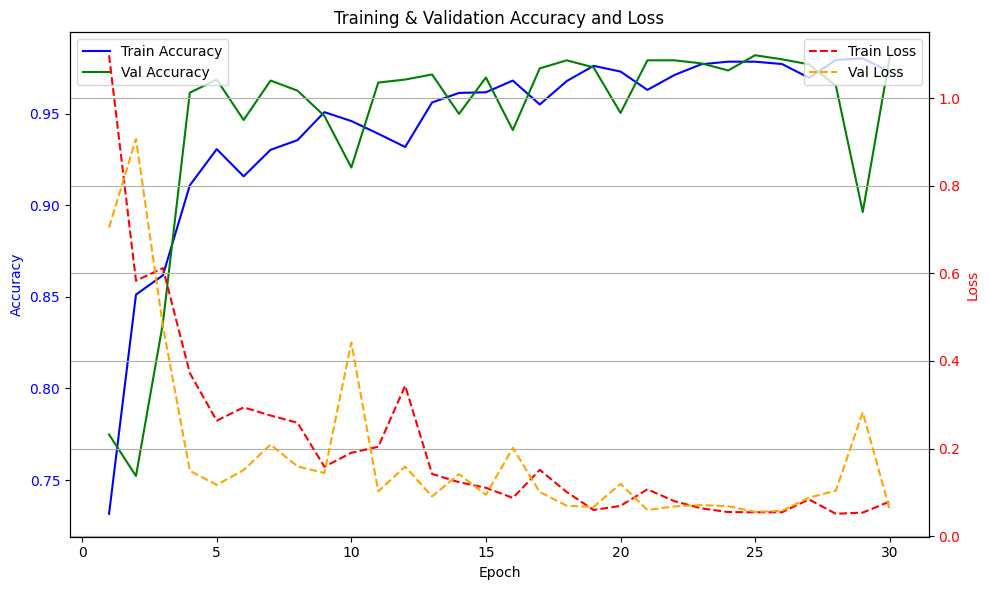

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
import numpy as np

epochs = range(1, len(history.history['accuracy']) + 1)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Accuracy plot (left Y-axis)
ax1.plot(epochs, history.history['accuracy'], 'b-', label='Train Accuracy')
ax1.plot(epochs, history.history['val_accuracy'], 'g-', label='Val Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Create second Y-axis for loss
ax2 = ax1.twinx()
ax2.plot(epochs, history.history['loss'], 'r--', label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], 'orange', linestyle='--', label='Val Loss')
ax2.set_ylabel('Loss', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(loc='upper right')

plt.title('Training & Validation Accuracy and Loss')
plt.grid(True)
plt.tight_layout()
plt.show()

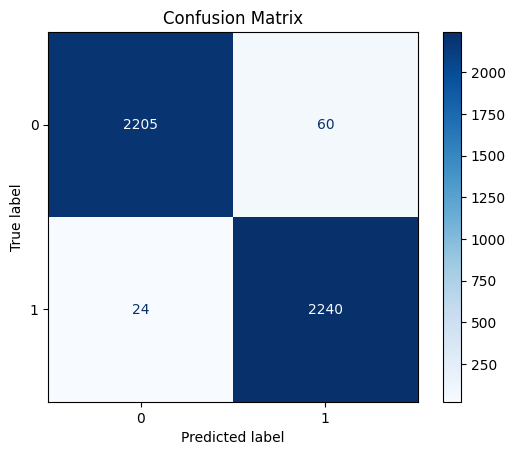

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

# Example: use latest predictions and true labels
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()



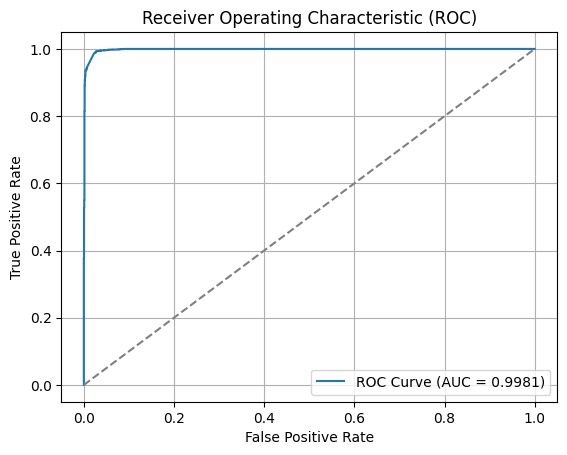

In [40]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


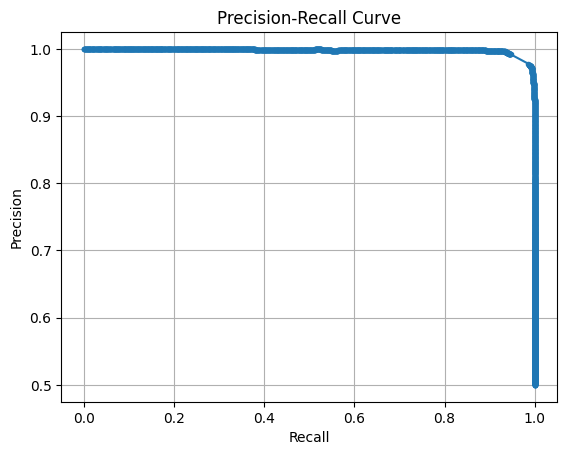

In [41]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure()
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()
